In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
seed =0
np.random.seed (seed)
tf.random.set_seed (seed)

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') /255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') /255

In [ ]:
Y_train = np_utils.to_categorical (Y_train, 10)
Y_test = np_utils.to_categorical (Y_test, 10)

In [ ]:
model = Sequential()
model.add( Dense( 512, input_dim= 784, activation= 'relu'))
model.add( Dense( 10, activation= 'softmax'))

In [ ]:
model.compile (loss= 'categorical_crossentropy',
               optimizer= 'adam',
               metrics=['accuracy'])

In [ ]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only= True )
early_stopping_callback= EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history= model.fit( X_train, Y_train, validation_data= (X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate( X_test, Y_test )[1]))


Epoch 00001: val_loss improved from inf to 0.16399, saving model to ./model/01-0.1640hdf5

Epoch 00002: val_loss improved from 0.16399 to 0.10259, saving model to ./model/02-0.1026hdf5

Epoch 00003: val_loss improved from 0.10259 to 0.08449, saving model to ./model/03-0.0845hdf5

Epoch 00004: val_loss improved from 0.08449 to 0.07617, saving model to ./model/04-0.0762hdf5

Epoch 00005: val_loss improved from 0.07617 to 0.06725, saving model to ./model/05-0.0672hdf5

Epoch 00006: val_loss improved from 0.06725 to 0.06696, saving model to ./model/06-0.0670hdf5

Epoch 00007: val_loss improved from 0.06696 to 0.06156, saving model to ./model/07-0.0616hdf5

Epoch 00008: val_loss did not improve from 0.06156

Epoch 00009: val_loss improved from 0.06156 to 0.05906, saving model to ./model/09-0.0591hdf5

Epoch 00010: val_loss did not improve from 0.05906

Epoch 00011: val_loss did not improve from 0.05906

Epoch 00012: val_loss did not improve from 0.05906

Epoch 00013: val_loss did not impro

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

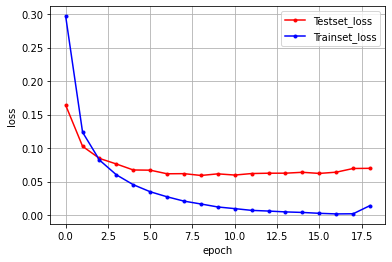

In [ ]:
x_len = np.arange(len(y_loss))
plt.plot( x_len, y_vloss, marker= '.', c='red', label='Testset_loss')
plt.plot( x_len,y_loss, marker='.', c='blue',label= 'Trainset_loss')

plt.legend( loc= 'upper right')

plt.grid()
plt.xlabel ('epoch')
plt.ylabel ('loss')
plt.show()